In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pyttsx3

In [4]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels=[]
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)##255/2=127.5
model.setInputMean((127.5,127.5,127.5))## mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000026B712141D0>

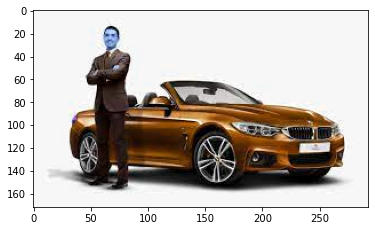

In [9]:
# read an image
img=cv2.imread('man-bmw.png')
plt.imshow(img) ##bgr

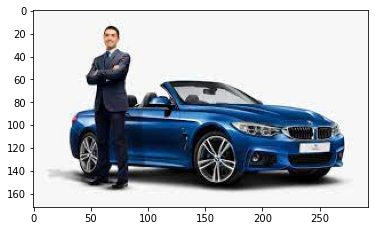

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
classIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [12]:
print(classIndex)

[1 3]


In [13]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
    #cv2.rectangle(frame(x,y),(x+w,y+h),(255,0,0),2)
    #cv2.putText(img,text,(text_offset_x,test_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

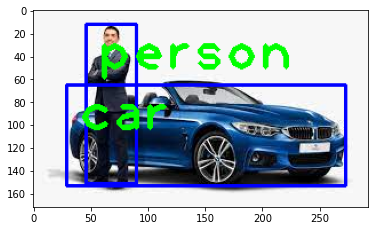

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
#VIDEO DEMO

In [16]:
cap=cv2.VideoCapture("")#for realtime video (webcam) use cap=cv2.VideoCapture(1)

#check if the video is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    
    classIndex,confidece,bbox =model.detect(frame,confThreshold=0.55)
    
    for i in classIndex:
        x=(classLabels[i-1])#print labels
        text_speech=pyttsx3.init()
        answer=(x)
        text_speech.say(answer)
        text_speech.runAndWait()
        
        
        
    if(len(classIndex)!=0):
        for classInd,conf,boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
            if(classInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('object detection',frame)
    
    if cv2.waitKey(2)&0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()